In [21]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
#Reading a csv file
file = "C:/Users/LENOVO/OneDrive/Desktop/TextBasedAnalysis/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


In [3]:
#Returning all the features
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [4]:
#Returning data types of Features
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [5]:
#Returns information about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [6]:
#Returning statistical info about numerical Features
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


In [7]:
#creating a new column named length
df['length']=df['text'].str.len()
df.describe()

,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


In [8]:
#Returning the following information by 'describe' function
df.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


In [9]:
#Replacing missing data with unknown
df['speaker'].fillna('unknown',inplace=True)
df['position'].fillna('unknown',inplace=True)
df.isna().sum()

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

In [10]:
#converting feature text to uppercase
df['speaker'] = df['speaker'].str.upper()
df['position'] = df['position'].str.upper()
df['text'] = df['text'].str.upper()

In [11]:
#returning all instances where speaker is 'BUSH'
df[df['speaker'].str.contains("BUSH")]

,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,BUSH,PRESIDENT,﻿I AM HONOURED TO ADDRESS THE GENERAL ASSEMBLY...,19779
2876,45,1990,USA,United States,GEORGE BUSH,UNKNOWN,﻿\nIT IS REALLY A GREAT PRIVILEGE TO GREET YOU...,15843
3038,46,1991,USA,United States,GEORGE BUSH,PRESIDENT,﻿I AM HONOURED TO SPEAK WITH YOU AS YOU OPEN T...,15555
3207,47,1992,USA,United States,MR. GEORGE BUSH,PRESIDENT,"FORTY-SEVEN YEARS AGO I WAS A YOUNG MAN OF 21,...",21105
4814,56,2001,USA,United States,GEORGE W. BUSH,PRESIDENT,﻿WE MEET IN A HALL DEVOTED TO\nPEACE; IN A CIT...,14724
5002,57,2002,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,﻿WE MEET ONE YEAR AND ONE DAY\nAFTER A TERRORI...,16684
5191,58,2003,USA,United States,GEORGE W. BUSH,PRESIDENT,"﻿TWENTY-FOUR MONTHS AGO, AND\nYESTERDAY IN THE...",16962
5382,59,2004,USA,United States,MR. GEORGE W BUSH,PRESIDENT,THANK YOU FOR THE HONOUR OF\nADDRESSING THE GE...,18628
5760,61,2006,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,I AM GRATEFUL FOR THE PRIVILEGE OF \nSPEAKING ...,16675
5951,62,2007,USA,United States,GEORGE W. BUSH,PRESIDENT,THANK YOU FOR THE OPPORTUNITY \nTO ADDRESS THE...,15483


<AxesSubplot:>

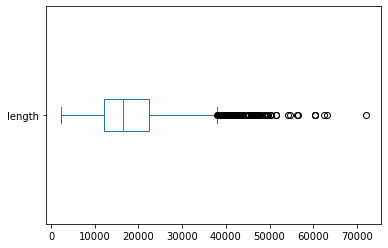

In [19]:
#Box plot of 'length' feature
df['length'].plot(kind='box', vert=False)

<AxesSubplot:>

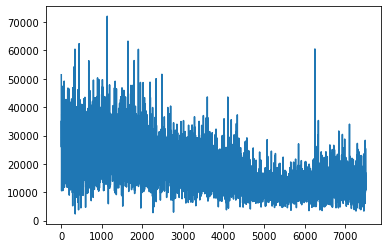

In [18]:
#df['length'].plot()

<AxesSubplot:ylabel='Frequency'>

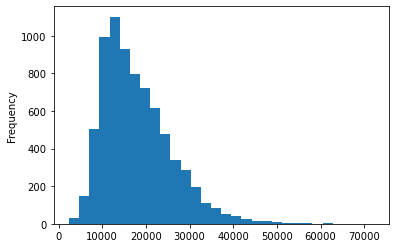

In [13]:
#Histoogram of 'Length' fetaure
df['length'].plot(kind='hist',bins=30)

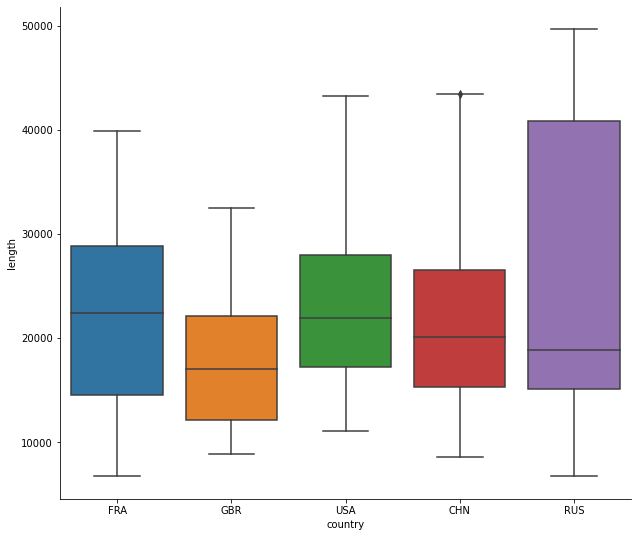

In [20]:
#oxplot for the 'length' variable based on the specified countries
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8) 

In [22]:
#Tokenize a given text based on a regular expression pattern
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [23]:
#testing the 'Tokenise' with a testtext
testtext = "Let's create a git branch using the commands from github.com"
testtokens = tokenize(testtext)
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']
